<a href="https://colab.research.google.com/github/deyaaa13/DataMining/blob/main/Pertemuan11_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING**

# Implementasi 1 - Basic Clustering - Data Dummy Make Blobs

**1. Import Library**

In [ ]:
import numpy as np #Used for working with arrays maths
import pandas as pd #Dataframe
from matplotlib import pyplot as plt #Plotting
from sklearn.datasets import make_blobs #Generate data
from sklearn.cluster import KMeans #Main algoritm

#Determining number of cluster
from sklearn.metrics import silhouette_score

**2. Load Dataset**

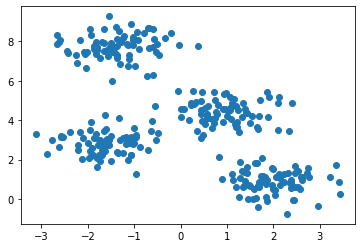

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #make
# n_samples ; jumlah data
#Centers : jumlah data
#Cluster_std : std cluster

plt.scatter(X[:,0], X[:,1])

***3. Determine Number of Clusters***

**Method 1-Elbow Method**

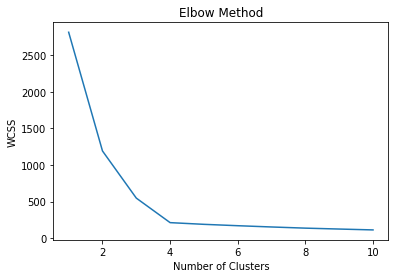

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Method 2-Silhouette Coefficient**

In [ ]:
#A list holds the silhouette coefficient
silhouette_coefficients = []

#Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

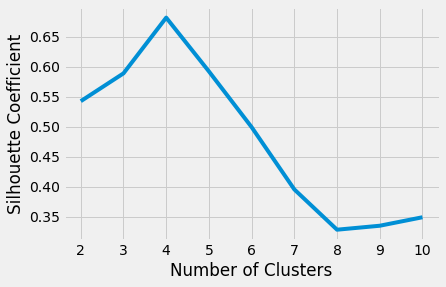

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**4. Create Cluster**

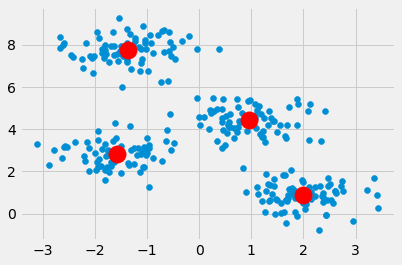

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

Dari gambar diatas dapat kita lihat bahwa

# Implementasi 2 - Mall Customer Segmentation

In [ ]:
import numpy as np #Used for working with arrays maths
import pandas as pd #Dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans #Main algoritm

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


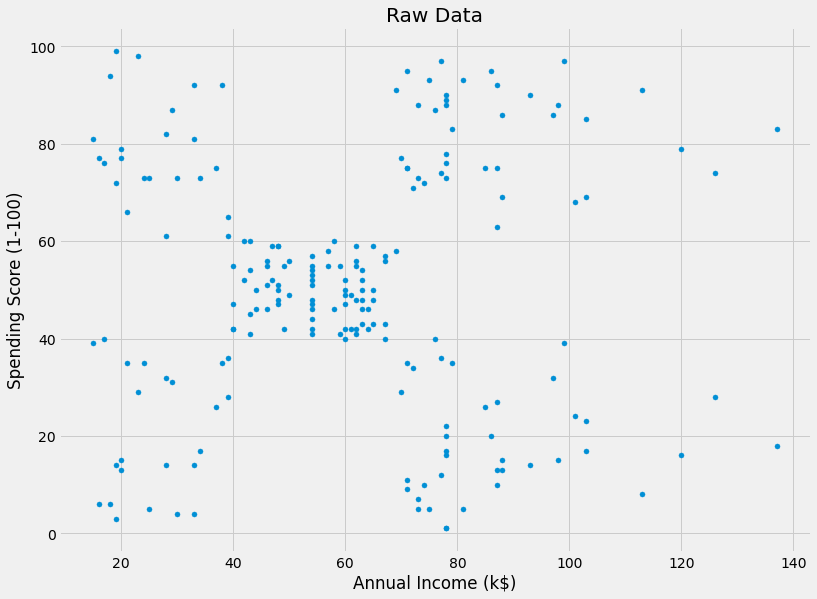

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 25)#Point
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Data Preprocessing**

Select Feature

In [ ]:
X = np.array(df.iloc[:,[3, 4]])

**Determine Number of Clusters**

Method 1-Elbow Method

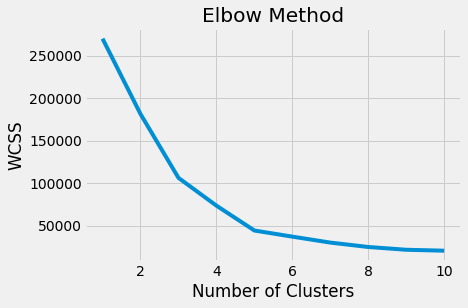

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Method 2-Silhouette Coefficient

In [ ]:
#A list holds the silhouette coefficient
silhouette_coefficients = []

#Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

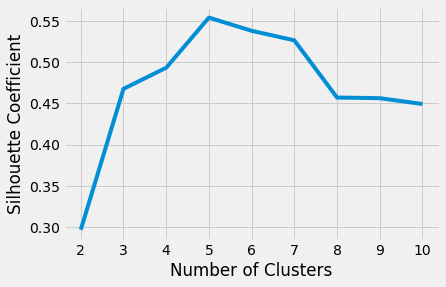

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Create Clusters**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)

In [ ]:
kmeans_preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

**Show Cluster**

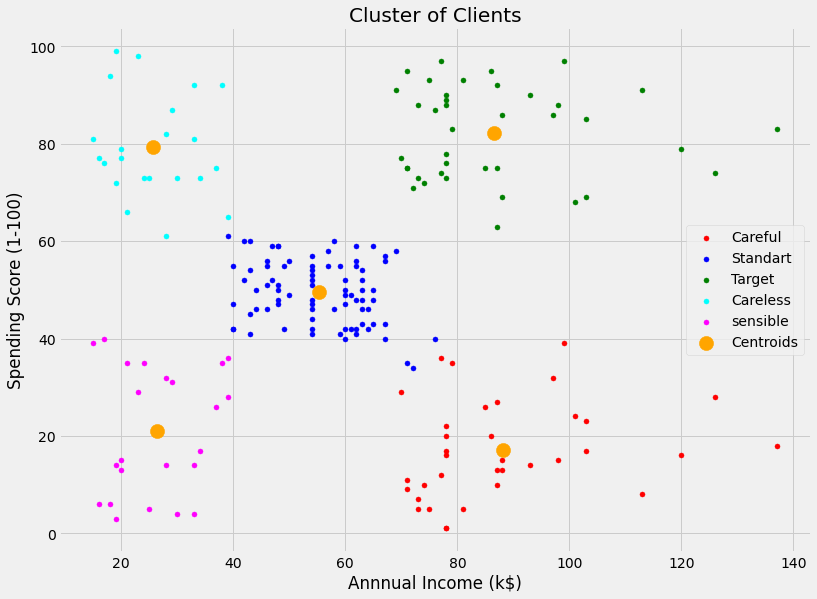

In [ ]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standart', 'Target', 'Careless', 'sensible']

plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size, c = colors[i], label = labels[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Centroids')

plt.title('Cluster of Clients')
plt.xlabel('Annnual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4


In [ ]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    35
1    81
2    39
3    22
4    23
Name: Cluster, dtype: int64

In [ ]:
#Predict one data
print(kmeans.predict([[100, 20]]))

[0]
